In [335]:
import pandas as pd
import os
import seaborn as sns


def district(borough: int):
    if borough == 1:
        return "Manhattan"
    elif borough == 2:
        return "Bronx"
    elif borough == 3:
        return "Brooklyn"
    elif borough == 4:
        return "Queens"
    elif borough == 5:
        return "Staten"



dir_path = "dataset/"
res = []
data = []
drop_list =["apartmentnumber", "zip_code", "block", "lot", "ease_ment", "address", "residential_units", "commercial_units"]


for path in os.listdir(dir_path):
    res.append(path)
    dirty_data = pd.read_excel(dir_path + path, skiprows=4)
    dirty_data.columns = [column.lower().replace("\n", "")
                          .replace(" ", "_").replace("-", "_")
                          for column in
                          dirty_data.columns]
    purified_data = dirty_data.drop(drop_list, axis=1)
    filtered_data = purified_data[(purified_data.total_units >0) & (purified_data.land_square_feet > 0)]
    clear_data = filtered_data[(filtered_data.saleprice.quantile(0.1)<filtered_data.saleprice) & (filtered_data.saleprice  < filtered_data.saleprice.quantile(0.9)) ]
    data.append(clear_data)
# df = pd.read_csv("dataset/nyt1.csv")
data = pd.concat(data)

data.insert(1, "district", [district(a) for a in data.borough])
data.columns
# print(data)

Index(['borough', 'district', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'building_class_at_present', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'saleprice', 'sale_date'],
      dtype='object')

In [336]:
data

,borough,district,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A5,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,2329,1431,1901,1,A1,343116,2013-07-01
5,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,B1,2,2000,2400,1993,1,B1,316500,2012-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,B9,2,3180,1900,1996,1,B9,440000,2013-06-26
6347,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,3160,1900,1995,1,B2,463500,2013-07-03
6348,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,5610,1670,1994,1,B2,560000,2013-04-18
6349,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,7525,2160,1994,1,B2,520000,2013-06-18


    district  borough  neighborhood  building_class_category  \
0      Bronx     2059          2059                     2059   
1   Brooklyn     7025          7025                     7025   
2  Manhattan     2327          2327                     2327   
3     Queens     7842          7842                     7842   
4     Staten     2640          2640                     2640   

   tax_class_at_present  building_class_at_present  total_units  \
0                  2059                       2059         2059   
1                  7025                       7025         7025   
2                  2327                       2327         2327   
3                  7842                       7842         7842   
4                  2640                       2640         2640   

   land_square_feet  gross_square_feet  year_built  tax_class_at_time_of_sale  \
0              2059               2059        2059                       2059   
1              7025               7025        7025

[Text(0.5, 1.0, 'Number of purchases by district'), Text(0, 0.5, 'Orders ')]

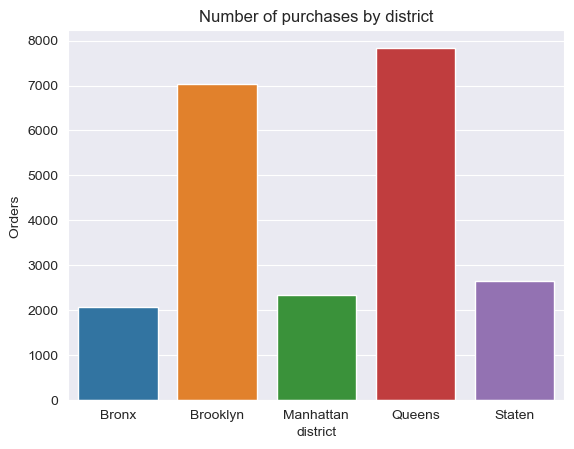

In [337]:
district_data_order = data.groupby(["district"], as_index=False).count()
print(district_data_order)

ax = sns.barplot(data=district_data_order,
                 x=district_data_order.district,
                 y=district_data_order.borough,
                 )
ax.set(title= "Number of purchases by district" , ylabel="Orders ")

,district,saleprice
0,Bronx,721605276
1,Brooklyn,3530301253
2,Manhattan,3709495281
3,Queens,3253748558
4,Staten,929249774


[Text(0.5, 1.0, 'Orders in district'), Text(0, 0.5, 'sum of purchases')]

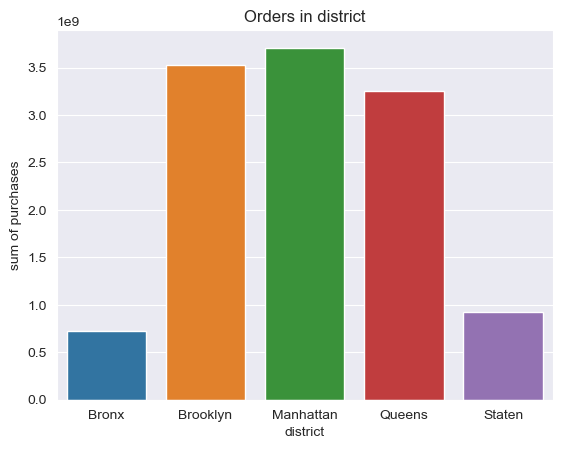

In [338]:
sum_data_order = data.groupby(["district"], as_index=False).sum()
display(sum_data_order[['district','saleprice']])

# print("district: {},\n earnings$:{}" .format(sum_data_order.district.to_list() , sum_data_order.saleprice.to_list() ))

ax = sns.barplot(data=sum_data_order,
                 x=sum_data_order.district,
                 y=sum_data_order.saleprice,
                 )
ax.set(title= "Orders in district" , ylabel="sum of purchases")

In [339]:
sum_data_order

,district,borough,total_units,land_square_feet,gross_square_feet,year_built,saleprice
0,Bronx,4118,6082,18874282,9016023,3992281,721605276
1,Brooklyn,21075,17836,18316782,20618773,13516073,3530301253
2,Manhattan,2327,17027,13185092,152607528,4565093,3709495281
3,Queens,31368,15985,26272515,17818190,15202364,3253748558
4,Staten,13200,3392,10073520,4812961,5186529,929249774


In [340]:
data.insert(1, "quarter", [str(value.quarter) for value in data.sale_date.to_list()])
data

,borough,quarter,district,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,3,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A5,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,1,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,3,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,A1,1,2329,1431,1901,1,A1,343116,2013-07-01
5,2,4,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,B1,2,2000,2400,1993,1,B1,316500,2012-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,5,2,Staten,WOODROW,02 TWO FAMILY HOMES,1,B9,2,3180,1900,1996,1,B9,440000,2013-06-26
6347,5,3,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,3160,1900,1995,1,B2,463500,2013-07-03
6348,5,2,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,5610,1670,1994,1,B2,560000,2013-04-18
6349,5,2,Staten,WOODROW,02 TWO FAMILY HOMES,1,B2,2,7525,2160,1994,1,B2,520000,2013-06-18


In [341]:
district_data_quarter = data.groupby(["district","quarter"], as_index=False).count()
display(district_data_quarter)

,district,quarter,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,Bronx,1,489,489,489,489,489,489,489,489,489,489,489,489,489
1,Bronx,2,536,536,536,536,536,536,536,536,536,536,536,536,536
2,Bronx,3,505,505,505,505,505,505,505,505,505,505,505,505,505
3,Bronx,4,529,529,529,529,529,529,529,529,529,529,529,529,529
4,Brooklyn,1,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
5,Brooklyn,2,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905
6,Brooklyn,3,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716
7,Brooklyn,4,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747
8,Manhattan,1,540,540,540,540,540,540,540,540,540,540,540,540,540
9,Manhattan,2,431,431,431,431,431,431,431,431,431,431,431,431,431


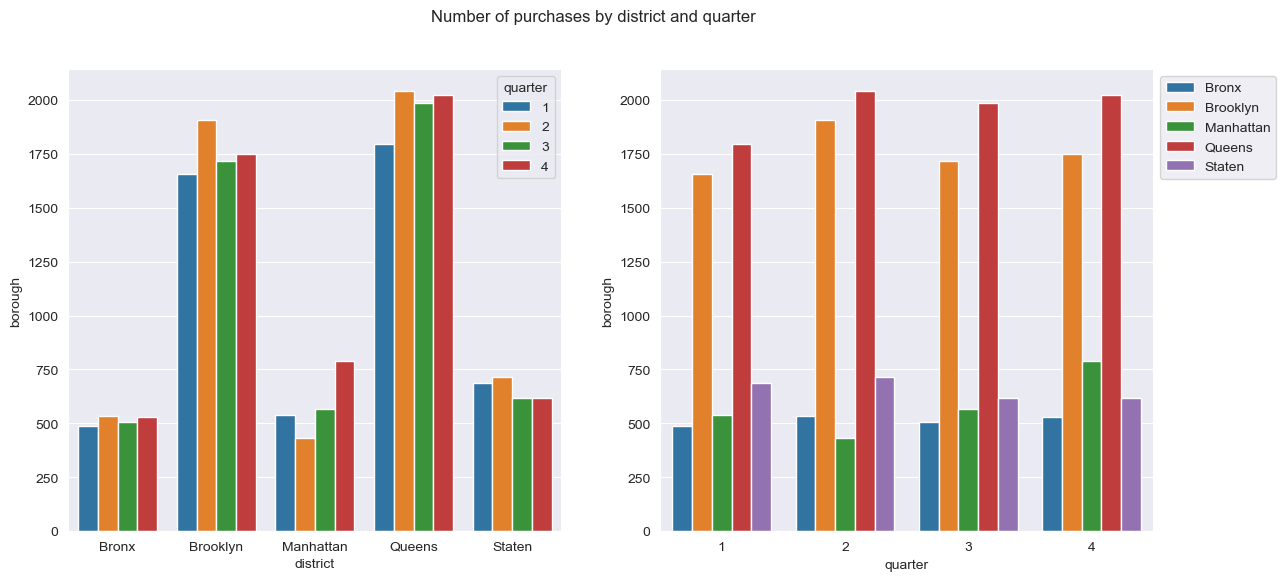

In [352]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(14,6))

fig.suptitle("Number of purchases by district and quarter")

sns.barplot(data=district_data_quarter,
                 x=district_data_quarter.district,
                 y=district_data_quarter.borough,
                 hue=district_data_quarter.quarter,
                   ax=axes[0]
                 )
sns.barplot(data=district_data_quarter,
                 x=district_data_quarter.quarter,
                 y=district_data_quarter.borough,
                 hue=district_data_quarter.district,
                   ax=axes[1]
                 )
plt.legend(bbox_to_anchor=(1,1),ncol=1,)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '01  ONE FAMILY HOMES                        '),
  Text(1, 0, '02  TWO FAMILY HOMES                        '),
  Text(2, 0, '03  THREE FAMILY HOMES                      '),
  Text(3, 0, '05  TAX CLASS 1 VACANT LAND                 '),
  Text(4, 0, '07  RENTALS - WALKUP APARTMENTS             '),
  Text(5, 0, '08  RENTALS - ELEVATOR APARTMENTS           '),
  Text(6, 0, '09  COOPS - WALKUP APARTMENTS               '),
  Text(7, 0, '10  COOPS - ELEVATOR APARTMENTS             '),
  Text(8, 0, '11A CONDO-RENTALS                           '),
  Text(9, 0, '14  RENTALS - 4-10 UNIT                     '),
  Text(10, 0, '21  OFFICE BUILDINGS                        '),
  Text(11, 0, '22  STORE BUILDINGS                         '),
  Text(12, 0, '23  LOFT BUILDINGS                          '),
  Text(13, 0, '25  LUXURY HOTELS                           '),
  Text

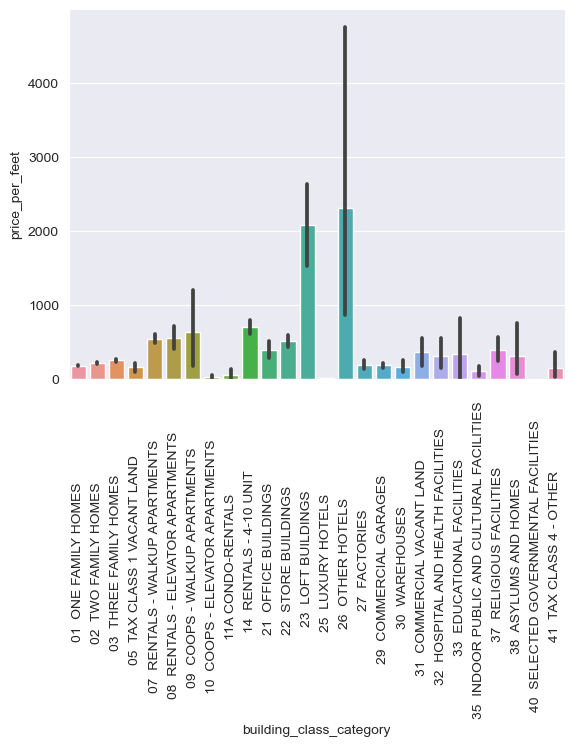

In [343]:
data['price_per_feet'] = data.saleprice / data.land_square_feet

data['month'] = data["sale_date"].dt.month
data_build_class__price_per_fit_ = data.groupby(["building_class_category","month"], as_index=False).mean()
sns.barplot(x= data_build_class__price_per_fit_.building_class_category, y = data_build_class__price_per_fit_.price_per_feet)
plt.xticks(rotation=90)



<AxesSubplot:xlabel='date', ylabel='saleprice'>

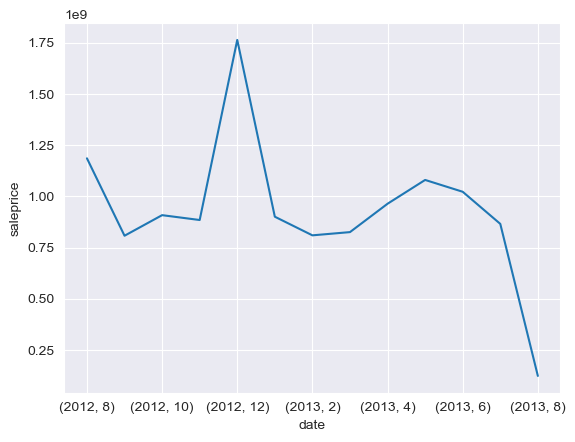

In [344]:
test = data.groupby([data["sale_date"].dt.year, data["sale_date"].dt.month],group_keys=True)["saleprice"].sum()
# test.sale_date
test.plot(kind = "line", xlabel="date", ylabel="saleprice")
# ax = sns.barplot(data=test,
#                  x=sale_data,
#                  y=test.saleprice,
#                  )